## Langchain Models

LLMs in LangChain refer to pure text completion models. 
The APIs they wrap take a string prompt as input and output a string completion. 
OpenAI's GPT-3 is implemented as an LLM.

In [2]:
from langchain_openai import OpenAI # refers to llm

llm = OpenAI(model='gpt-3.5-turbo-instruct')

result = llm.invoke("what is the capital of india")
print(result)



The capital of India is New Delhi. 


Chat models are often backed by LLMs but tuned specifically for having conversations. 
Crucially, their provider APIs use a different interface than pure text completion models. 
Instead of a single string, they take a list of chat messages as input and they return an AI message as output. 

* chatmodel() and openAI() llm have the same base class internally.

In [3]:
from langchain_openai import ChatOpenAI


model = ChatOpenAI(model='gpt-4', temperature=1, max_completion_tokens=10) 
res = model.invoke("capital of india?")

print(res.content)

New Delhi


**max_completion_token** : *integer value range from 1 -> 4096*. 
The maximum number of tokens to generate in the completion.

**temperature value range from 0 -> 2**

Controls the randomness of the model's output. A higher value (e.g., 1.0) makes responses more creative, 
while a lower value (e.g., 0.0) makes them more deterministic and focused. In simple words, at temperature=0, the model will pick up highly likely words but when increased the temperature value>=1 the model will choose words carefully and creatively.

**We should talk more about temperature as it is very important...**

1. *Raw scores ( logits ):* When the model finishes reading the current prompt it produces one real‑number score for every token in its vocabulary (tens of thousands of them). Higher score ⇒ the model thinks that token would fit the context better.
2. *Probabilities:* Those scores aren’t probabilities yet; they can be any real number, positive or negative. To turn them into a bona‑fide probability distribution (values between 0 and 1 that add up to 1) we feed them through the softmax function.

    Softmax function, $\mathrm{prob}_i = \dfrac{e^{\mathrm{logit}_i}}{\sum_j e^{\mathrm{logit}_j}}$

3.With temperature 𝑇, we simply divide each logit by 𝑇 before exponentiating :

$$\mathrm{prob}_i = \dfrac{e^{\mathrm{logit}_i / T}}{\sum_j e^{\mathrm{logit}_j / T}}$$
      

    
This means that when 𝑇=1, the probabilities are the same as before. When 𝑇<1, the model is more confident about its predictions (higher scores become even higher, lower scores become even lower). When 𝑇>1, the model is less confident (higher scores become lower, lower scores become higher). 


**A concrete example**

Suppose the model’s logits for “The cat”→ next word are:

| Word    | Logit |
|:-------:|:-----:|
| **sat** | 3.0   |
| **runs**| 1.0   |
| **jumps**| 0.0  |

Below are the resulting probabilities at different temperatures:

| Token   | Logit | P(T=0.5) | P(T=1) | P(T=2) |
|:-------:|:-----:|:--------:|:------:|:------:|
| sat     | 3.0   | 0.980    | 0.843  | 0.629  |
| runs    | 1.0   | 0.018    | 0.114  | 0.231  |
| jumps   | 0.0   | 0.002    | 0.042  | 0.140  |

- **T = 0.5**: “sat” nearly always wins (98%).  
- **T = 1**: standard balance (84%/11%/4%).  
- **T = 2**: more exploration (63%/23%/14%).



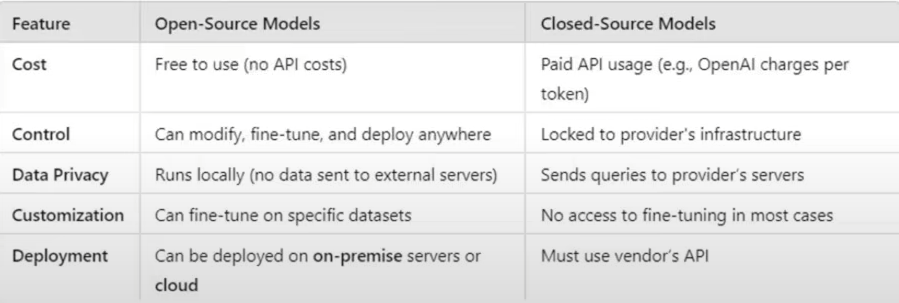

Using huggingface opensource models with langchain.

In [ ]:
from langchain_huggingface import ChatHuggingFace, HuggingFaceEndpoint
import getpass
import os

# os.getenv("HUGGINGFACEHUB_API_TOKEN")

llm = HuggingFaceEndpoint(
    repo_id="TinyLlama/TinyLlama-1.1B-Chat-v1.0", 
    # this api is at huggingface servers & we are calling that api deployed in thier servers.
    task="text-generation",
)

model = ChatHuggingFace(llm=llm)
res = model.invoke("what is the capital of india")

print(res.content)

The capital of India is New Delhi and its official name is "India". However, New Delhi is not the capital of India but the national capital territory (NCT) of Delhi. The other states that make up India have their respective state capitals, and the respective states have direct participatory and central governance at the state level. 

The current capital of India is New Delhi, which was formerly known as the capital of the Old Delhi circle. The city of New Delhi was established in 1193 by Guru Parikshit, the second Guru of the Sikhs. The absolute monarchy of the Mughal dynasty ruled over the city in turn. The city was governed by the Nawabs till 1748, when the British defeated them in a battle code-named "Battle of Plassey". Thereafter, the British defeated the Nawab formed the British Raj.

New Delhi still serves as the political center of the Indian state of Delhi, although it is not the central political office of the state itself. The offices of the secretariat, which includes the 

In above code, we are calling that api deployed in thier servers. Let's run the code by downloading those huggingface models locally on our machine. Leads to increased privacy.

In [17]:
from langchain_huggingface import ChatHuggingFace, HuggingFacePipeline


llm = HuggingFacePipeline.from_model_id(
    model_id="TinyLlama/TinyLlama-1.1B-Chat-v1.0",
    task = 'text-generation',
    pipeline_kwargs=dict(temperature=0.5, max_new_tokens=100)

)

model = ChatHuggingFace(llm=llm)
res = model.invoke("what is the capital of india")

print(res.content)


d:\GenerativeAI\venv\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\shubh\.cache\huggingface\hub\models--TinyLlama--TinyLlama-1.1B-Chat-v1.0. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu
d:\GenerativeAI\venv\Lib\site-packages\transformers\generation\configuration_utils.py:631: 

<|user|>
what is the capital of india</s>
<|assistant|>
The capital of India is New Delhi.


Took so much time to download the models. So that is a tradeoff !!!

Let's work with some embeddings as well !

In [37]:
from langchain_openai import OpenAIEmbeddings

embedding = OpenAIEmbeddings(model='text-embedding-3-large', dimensions=5)

result = embedding.embed_query("I love delhi")
result

[0.10648205876350403,
 -0.19821235537528992,
 -0.4945357143878937,
 0.72026127576828,
 0.43131381273269653]

In [38]:
embedding.embed_query("I Love delhi")

[0.21702513098716736,
 -0.3026890754699707,
 -0.5081062316894531,
 0.6435816287994385,
 0.43463799357414246]

By default the lenght of the embedding vector is 1536 for text-embedding-3-small and 3072 for text-embedding-large. larger the dimension, more is the contextual understanding of the model.

Generating the embeddings of multiple documents using langchain below :

In [41]:
from langchain_openai import OpenAIEmbeddings

embedding = OpenAIEmbeddings(model='text-embedding-3-large', dimensions=10)

documents = [

    "Virat Kohli is an Indian cricketer known for his aggressive batting and leadership.",
    "MS Dhoni is a former Indian captain famous for his calm demeanor and finishing skills.",
    "Sachin Tendulkar, also known as the 'God of Cricket', holds many batting records.",
    "Rohit Sharma is known for his elegant batting and record-breaking double centuries.",
    "Jasprit Bumrah is an Indian fast bowler known for his unorthodox action and yorkers."
]


result = embedding.embed_documents(documents)
result

[[0.013359124772250652,
  -0.30697381496429443,
  -0.07678583264350891,
  0.3664701282978058,
  -0.2710387408733368,
  0.3040922284126282,
  -0.471224308013916,
  -0.2664620876312256,
  -0.5336021780967712,
  -0.14721521735191345],
 [0.5574308037757874,
  -0.47712957859039307,
  -0.20211739838123322,
  0.4642657935619354,
  -0.1897408664226532,
  0.05213732272386551,
  -0.3788970112800598,
  -0.10963455587625504,
  0.005305094178766012,
  -0.10437209904193878],
 [0.5346757769584656,
  -0.06604910641908646,
  -0.18393222987651825,
  0.34493184089660645,
  -0.4775012731552124,
  0.01943775825202465,
  -0.3226275146007538,
  -0.3147738575935364,
  0.350586473941803,
  0.049831341952085495],
 [0.042810533195734024,
  -0.5126867294311523,
  -0.19530217349529266,
  -0.13091927766799927,
  -0.6665521860122681,
  0.13388966023921967,
  -0.32050347328186035,
  -0.2039162516593933,
  -0.24030335247516632,
  0.12557260692119598],
 [-0.06446800380945206,
  -0.3033187687397003,
  -0.089489251375198

**Let's build a simple similarity search application using langchain.**

In [54]:
from langchain_openai import OpenAIEmbeddings
from sklearn.metrics.pairwise import cosine_similarity 

embedding = OpenAIEmbeddings(model='text-embedding-3-large', dimensions=300) # Giving it more contextual understanding

documents = [

    "Virat Kohli is an Indian cricketer known for his aggressive batting and leadership.",
    "MS Dhoni is a former Indian captain famous for his calm demeanor and finishing skills.",
    "Sachin Tendulkar, also known as the 'God of Cricket', holds many batting records.",
    "Rohit Sharma is known for his elegant batting and record-breaking double centuries.",
    "Jasprit Bumrah is an Indian fast bowler known for his unorthodox action and yorkers."
]

Query = 'Who is virat kohli'

doc_embeddings = embedding.embed_documents(documents)
Query_embeddings = embedding.embed_query(Query)

scores = cosine_similarity([Query_embeddings], doc_embeddings)[0]
print('Similarity scores:',scores)

index, score = sorted(list(enumerate(scores)),key=lambda x:x[1])[-1]

print(documents[index])
print('sim score is', score)


Similarity scores: [0.76524459 0.39198251 0.38297714 0.43065566 0.47522099]
Virat Kohli is an Indian cricketer known for his aggressive batting and leadership.
sim score is 0.7652445857317111
